In [503]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
using Plots

In [504]:
W = zeros(1000,1000)
#W[:,498:502] .= 1e3
W[:, 500] .= 1e6
I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000,dy=1000, Te = 100e3, ncores=6);
#heatmap(I)#-1e15)  )#- IsoFlex.flexural(W))


0.0048399962485747555

In [ ]:
W = zeros(1000,1000)
#W[:,498:502] .= 1e3
W[:,500] .= 1e6
I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 50e3, ncores=6);
heatmap(I)#-1e15)  )#- IsoFlex.flexural(W))

In [506]:
w_line = I[500,:];

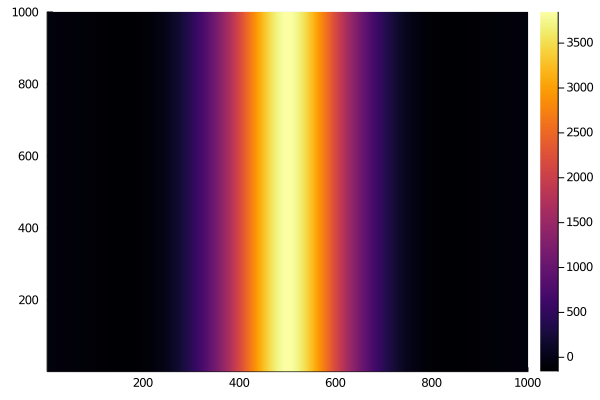

In [507]:

heatmap(I)#- IsoFlex.flexural(W))

## Analytic


In [ ]:
# w = we * exp( - abs(x) / beta ) * [ beta * cos( x / gamma ) + gamma * sin(abs(x) / gamma) ] ; garcia, sandwell et al.  2014 GJI
# we = V0 / (2 * alpha^2 * dRho * g) 
# alpha = [4D0 / (dRho * g)] ^ 1/4 
# beta = [ (dRho * g / (4D0)) ^ 1/2 + (Nx / 4D0)] ^ -1/2
# gamma =  [ (dRho * g / (4D0)) ^ 1/2 - (Nx / 4D0)] ^ -1/2

In [501]:
pm = 3300
pc = 2750
Te = 100e3
v = .25
Nx = 0
E = 100e9
g = 9.18
D0 = E * Te^3 / (12 * (1-v^2))
dRho = pm-pc
V0 = 1e6 * 2750* 1000* 1.4142

beta =  ((dRho * g / (4*D0)) ^ .5 + (Nx / 4*D0) + 0im) ^ -.5
gamma = ((dRho * g / (4*D0)) ^ .5 - (Nx / 4*D0) + 0im) ^ -.5
alpha = (4 * D0 / (dRho * g)) ^ .25

we = V0 / (2 * alpha^2 * dRho * g) 
wl = V0 * alpha^3 / (8 * D0 )

x = float(collect(-5e6/2:1000:5e6/2-1000))
w0 = real(wl * exp.( - abs.(x) ./ alpha ) .* ( cos.( x ./ alpha ) .+ sin.(abs.(x) ./ alpha) ));
w = real(we * exp.( .- abs.(x) ./ beta ) .* ( beta .* cos.( x ./ gamma ) .+ gamma .* sin.(abs.(x) ./ gamma) ));

In [502]:
D0

8.88888888888889e24

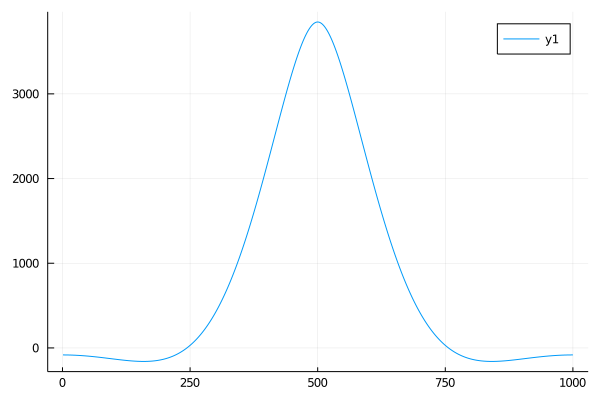

In [498]:
#plot(w0)
plot(w_line)

In [499]:
length(w)

5000

In [500]:
## Gflex compare